In [4]:
#Follow tutorial here: https://docs.scvi-tools.org/en/stable/tutorials/notebooks/api_overview.html

#Enable autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import anndata as ad
import torch
from datetime import datetime
import os

import scib_metrics
from scib_metrics.benchmark import Benchmarker

import numpy as np
import pandas as pd
#import scrublet as scr
import seaborn as sns

#personal modules
# from modules_scvi.mapping import *
# from modules_scvi.scvi_analysis import *
# from modules_scvi.utils import *
# from modules_scvi.var import *

dir_res = 'results_transcriptomic'
# torch.set_float32_matmul_precision('high')
torch.set_float32_matmul_precision('medium')

import scvi_dev
# from scvi_dev.model.lfvi import LFVI
# from scvi_dev.model.farconvi import FarconVI
from scvi_dev.model.fairvi import FairVI

sc.set_figure_params(figsize=(4, 4))

# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

sns.set_style(style='ticks')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  10%|█         | 1/10 [01:08<10:18, 68.76s/it, Bio conservation: nmi_ari_cluster_labels_kmeans]
                                                                                  
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                          

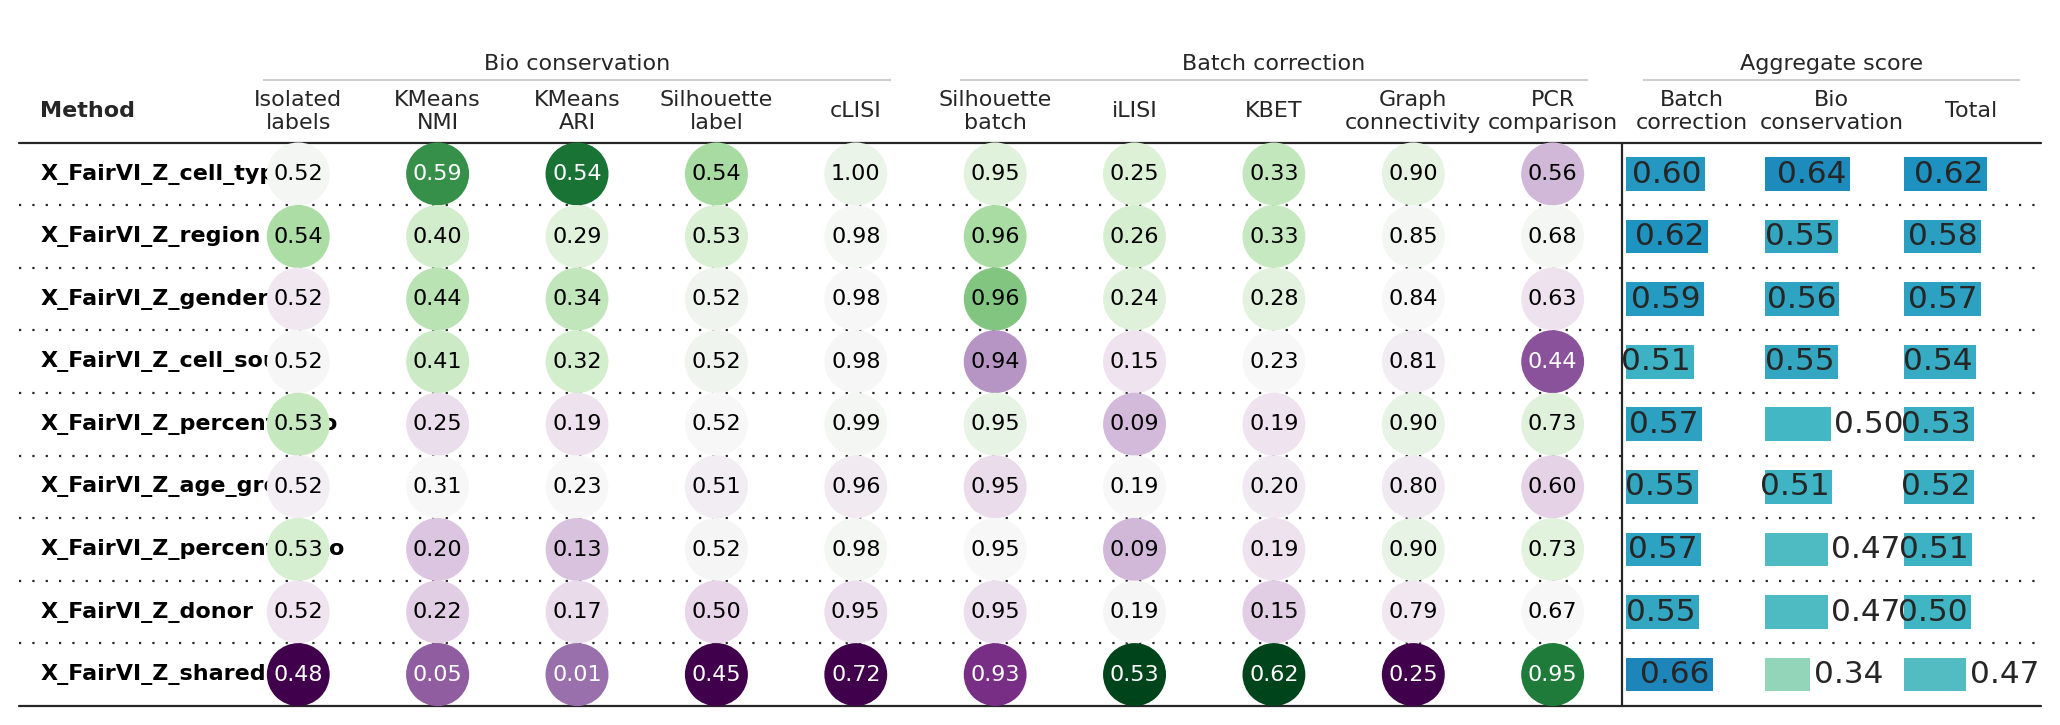

                          Isolated labels        KMeans NMI        KMeans ARI   
Embedding                                                                       
X_FairVI_Z_cell_type              0.52327          0.592505          0.539221  \
X_FairVI_Z_cell_source           0.522392          0.411515          0.315761   
X_FairVI_Z_donor                 0.517734          0.217608          0.174921   
X_FairVI_Z_gender                0.518391           0.44019          0.344563   
X_FairVI_Z_age_group             0.520166          0.308735          0.233754   
X_FairVI_Z_region                0.539122          0.400903          0.290888   
X_FairVI_Z_percent_mito          0.531371          0.204483          0.130354   
X_FairVI_Z_percent_ribo          0.534431          0.251534          0.189737   
X_FairVI_Z_shared                 0.47825          0.047021          0.011222   
Metric Type              Bio conservation  Bio conservation  Bio conservation   

                         Si

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  80%|████████  | 8/10 [00:48<00:09,  4.76s/it, Batch correction: pcr_comparison]    /nfs/users/nfs_a/am74/.local/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                             

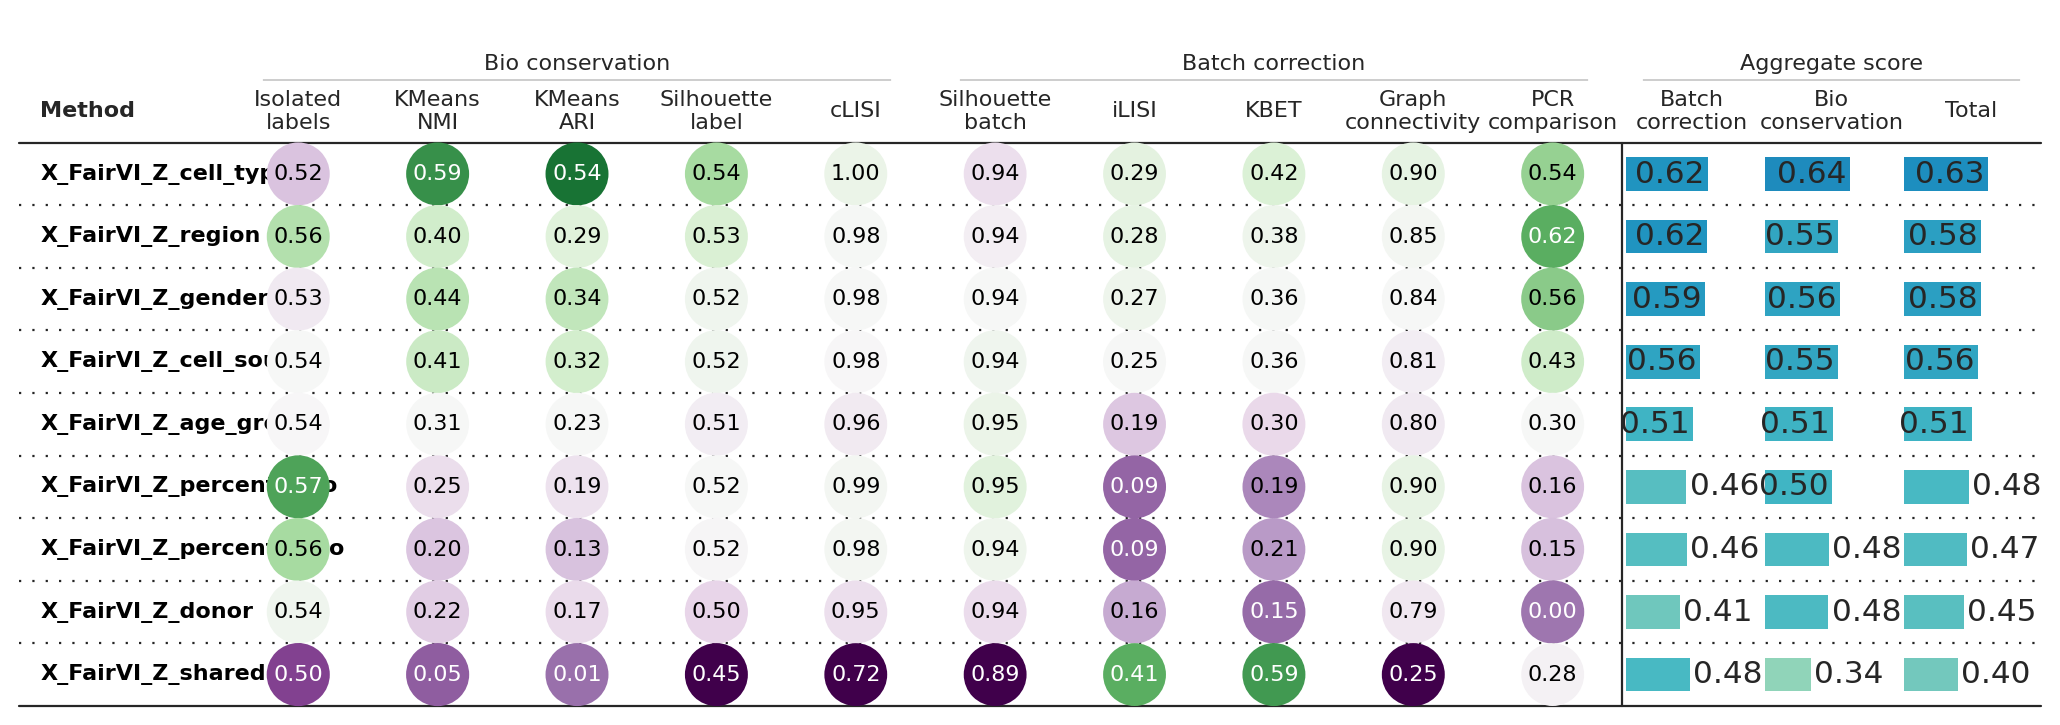

                          Isolated labels        KMeans NMI        KMeans ARI   
Embedding                                                                       
X_FairVI_Z_cell_type             0.524455          0.592505          0.539221  \
X_FairVI_Z_cell_source           0.538607          0.411515          0.315761   
X_FairVI_Z_donor                 0.541085          0.217608          0.174921   
X_FairVI_Z_gender                0.534334           0.44019          0.344563   
X_FairVI_Z_age_group             0.538228          0.308735          0.233754   
X_FairVI_Z_region                0.556598          0.400903          0.290888   
X_FairVI_Z_percent_mito          0.559019          0.204483          0.130354   
X_FairVI_Z_percent_ribo          0.571877          0.251534          0.189737   
X_FairVI_Z_shared                0.500476          0.047021          0.011222   
Metric Type              Bio conservation  Bio conservation  Bio conservation   

                         Si

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  80%|████████  | 8/10 [03:58<00:24, 12.50s/it, Batch correction: pcr_comparison]    /nfs/users/nfs_a/am74/.local/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  80%|████████  | 8/10 [03:56<00:24, 12.28s/it, Batch correction: pcr_comparison]    /nfs/users/nfs_a/am74/.local/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution 

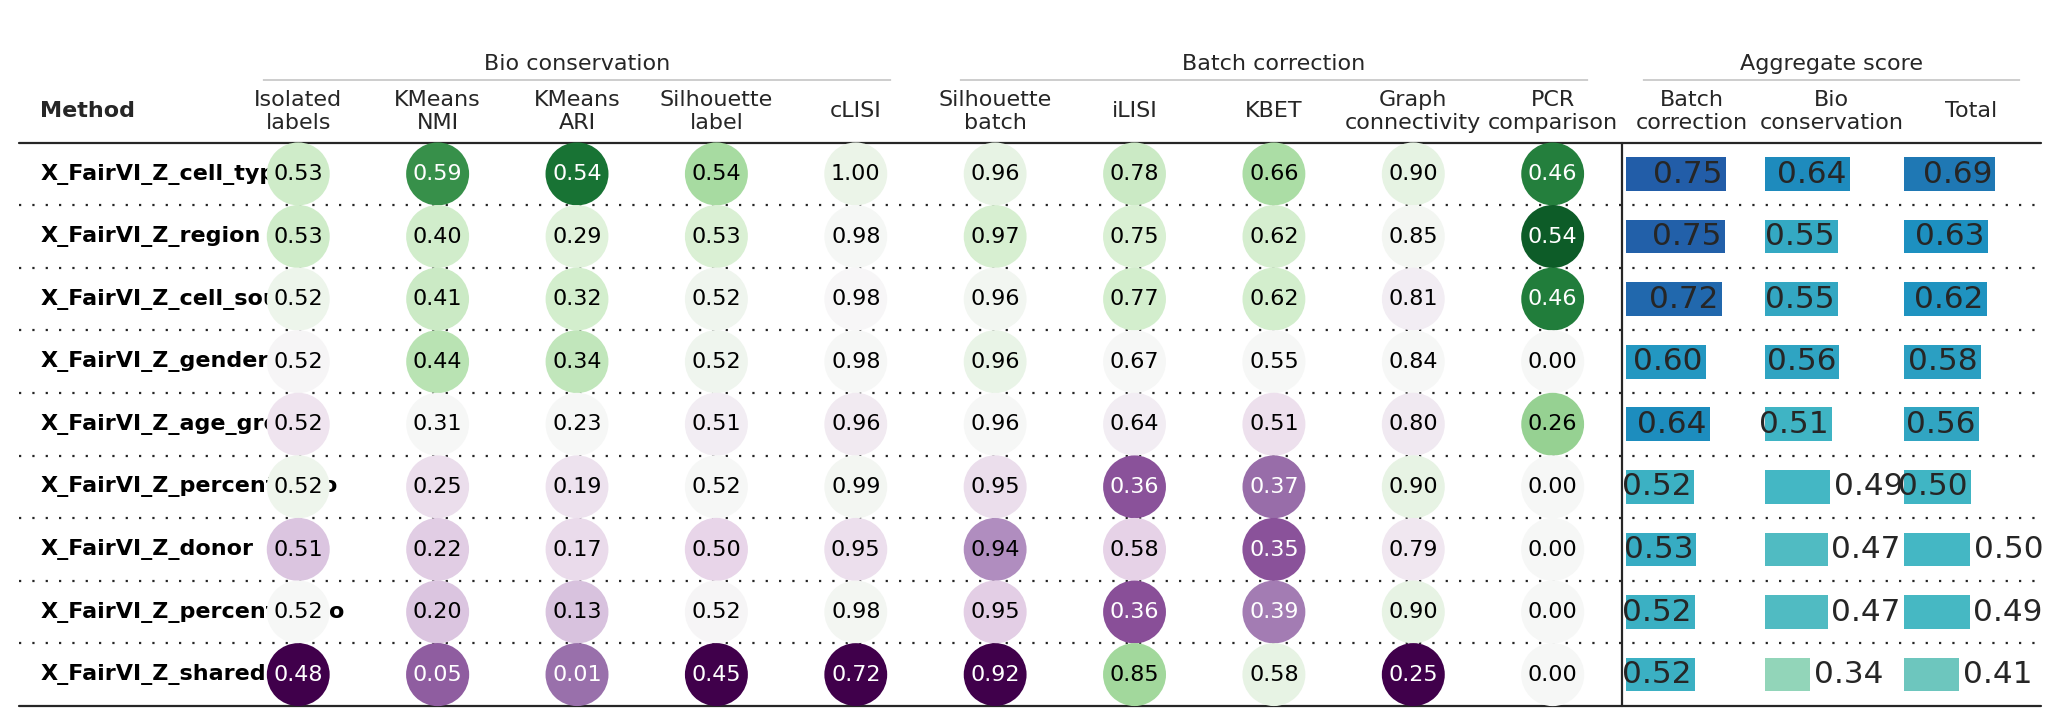

                          Isolated labels        KMeans NMI        KMeans ARI   
Embedding                                                                       
X_FairVI_Z_cell_type             0.527222          0.592505          0.539221  \
X_FairVI_Z_cell_source           0.521319          0.411515          0.315761   
X_FairVI_Z_donor                 0.510021          0.217608          0.174921   
X_FairVI_Z_gender                0.518774           0.44019          0.344563   
X_FairVI_Z_age_group             0.515453          0.308735          0.233754   
X_FairVI_Z_region                0.527182          0.400903          0.290888   
X_FairVI_Z_percent_mito          0.519095          0.204483          0.130354   
X_FairVI_Z_percent_ribo          0.521026          0.251534          0.189737   
X_FairVI_Z_shared                0.482167          0.047021          0.011222   
Metric Type              Bio conservation  Bio conservation  Bio conservation   

                         Si

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00

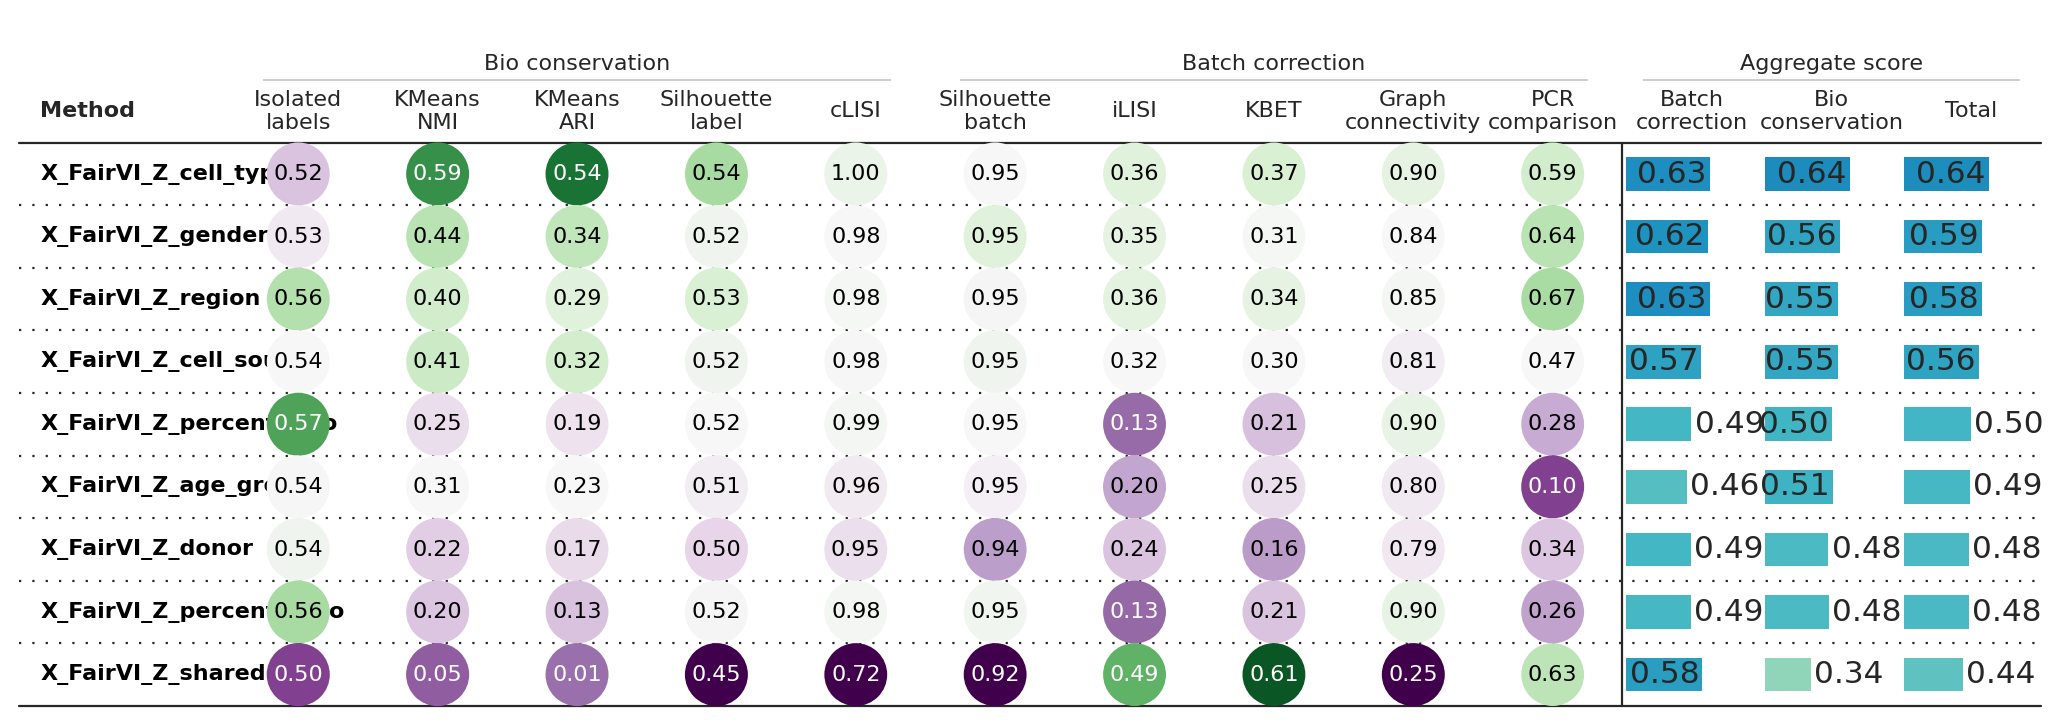

                          Isolated labels        KMeans NMI        KMeans ARI   
Embedding                                                                       
X_FairVI_Z_cell_type             0.524455          0.592505          0.539221  \
X_FairVI_Z_cell_source           0.538607          0.411515          0.315761   
X_FairVI_Z_donor                 0.541085          0.217608          0.174921   
X_FairVI_Z_gender                0.534334           0.44019          0.344563   
X_FairVI_Z_age_group             0.538228          0.308735          0.233754   
X_FairVI_Z_region                0.556598          0.400903          0.290888   
X_FairVI_Z_percent_mito          0.559019          0.204483          0.130354   
X_FairVI_Z_percent_ribo          0.571877          0.251534          0.189737   
X_FairVI_Z_shared                0.500476          0.047021          0.011222   
Metric Type              Bio conservation  Bio conservation  Bio conservation   

                         Si

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  80%|████████  | 8/10 [00:50<00:09,  4.89s/it, Batch correction: pcr_comparison]    /nfs/users/nfs_a/am74/.local/lib/python3.8/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  wa

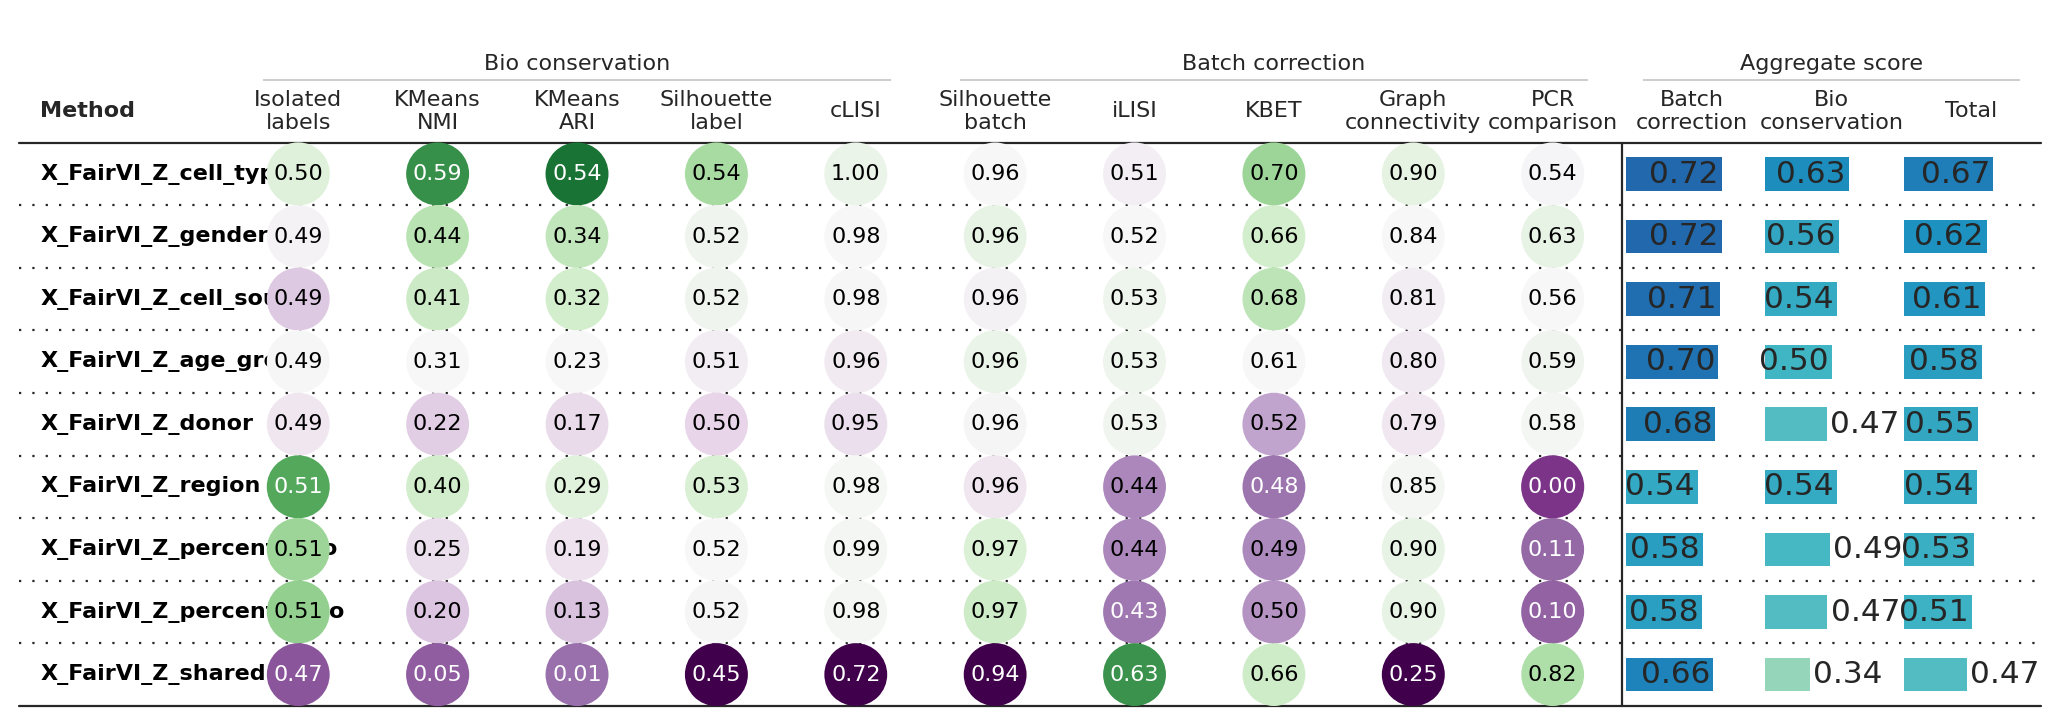

                          Isolated labels        KMeans NMI        KMeans ARI   
Embedding                                                                       
X_FairVI_Z_cell_type             0.498153          0.592505          0.539221  \
X_FairVI_Z_cell_source           0.486434          0.411515          0.315761   
X_FairVI_Z_donor                 0.490607          0.217608          0.174921   
X_FairVI_Z_gender                0.492807           0.44019          0.344563   
X_FairVI_Z_age_group             0.493552          0.308735          0.233754   
X_FairVI_Z_region                0.511701          0.400903          0.290888   
X_FairVI_Z_percent_mito          0.506573          0.204483          0.130354   
X_FairVI_Z_percent_ribo          0.506045          0.251534          0.189737   
X_FairVI_Z_shared                0.473786          0.047021          0.011222   
Metric Type              Bio conservation  Bio conservation  Bio conservation   

                         Si

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                          
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                          
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                          
Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                          
Metrics:  80%|████████  | 8/10 [00:47<00:08,  4.35s/it, Batch correction: pcr_comparison]    

In [ ]:
covs = [(["cell_type", "cell_source", "donor", "gender", "age_group", "region"], ["percent_mito", "percent_ribo"])]

for cat_cov, cont_cov in covs:

    epochs=20
    batch_size=128
    alpha=0.2
    beta=2

    module_name = 'FairVI'    
    new_model_name = f'e{epochs}_batch{batch_size}_a{alpha}_b{beta}_HeartCellAtlas_all'

    adata = ad.read_h5ad(os.path.join(dir_res, f'data/{module_name}/{new_model_name}.h5ad'))
    
    all_covs = cat_cov+cont_cov
    
    all_obsm_keys = [f'X_{module_name}_Z_{latent_name}' for latent_name in all_covs] + [f'X_{module_name}_Z_shared']

    all_df = []
    all_bm = []

    for c_label in all_covs:
        for c_batch in all_covs:
            if c_batch != c_label:
                
                save_dir = f'{dir_res}/benchmark/model_name={new_model_name},batch_key={c_batch},label_key={c_label}'
                if not os.path.exists(save_dir):
                    os.makedirs(save_dir)
                
                bm = Benchmarker(
                    adata,
                    batch_key=c_batch,
                    label_key=c_label,
                    embedding_obsm_keys=all_obsm_keys,
                    n_jobs=-1,
                )
                bm.benchmark()        
                bm.plot_results_table(min_max_scale=False, save_dir=save_dir)              
                df = bm.get_results(min_max_scale=False)
                
                all_df.append(df)
                all_bm.append(bm)

                # df = bm._results.transpose()
                # df.index.name = "Embedding"
                # df = df.loc[df.index != "Metric Type"]
                # df = df.transpose()
                # df["Metric Type"] = bm._results["Metric Type"].values
                                    
                print(df)
